**Aprendizaje Automático** - 2025
# Clase 1: Repaso de exploracion de datos

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Análisis exploratorio de datos con el Titanic Dataset (35 minutos)
El conjunto de datos del Titanic es uno de los más famosos y utilizados en el análisis de datos y la ciencia de datos. Contiene información sobre los pasajeros a bordo del famoso barco que se hundió en 1912, incluyendo detalles como la edad, el género, la clase de pasajero, el precio del billete, la cabina y si sobrevivieron o no al desastre. Este conjunto de datos es útil para explorar patrones y relaciones en los datos, así como para crear modelos predictivos para predecir la supervivencia de un pasajero en función de sus características.

> *El hundimiento del RMS Titanic es uno de los naufragios más infames de la historia. El 15 de abril de 1912, durante su viaje inaugural, el Titanic se hundió tras chocar con un iceberg, matando a 1502 de los 2224 pasajeros y tripulantes. Esta sensacional tragedia conmocionó a la comunidad internacional y dio lugar a mejores normas de seguridad para los buques.*

> *Una de las razones por las que el naufragio provocó tanta pérdida de vidas fue que no había suficientes botes salvavidas para los pasajeros y la tripulación. Aunque hubo algún elemento de suerte involucrado en sobrevivir al hundimiento, algunos grupos de personas tenían más probabilidades de sobrevivir que otros, como las mujeres, los niños y la clase alta.*

En este ejercicio utilizaremos este conjunto de datos para explorar los patrones y relaciones en los datos y para crear visualizaciones que nos ayuden a comprender mejor los datos.



## Parte 1: Carga y acondicionamiento del dataset (15 minutos)

Descarguen los datos del campus y carguenlos de la manera que les parezca mas adecuada.

In [ ]:
#train = pd.read_csv('/content/train.csv')
#test = pd.read_csv('/content/test.csv')

# correccion
# train = train.iloc[1:,:]

#print(train.shape)
#print(test.shape)

In [ ]:
# otra forma de cargarlos
train = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/dsindy/kaggle-titanic/master/data/test.csv')

print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


Utilicemos el conjunto denominado `train` e imprimamos el tipo de dato de cada columna.

In [ ]:
# veamos las columnas
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# ¿Qué muestra con describe()?
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [ ]:
# Contar valores faltantes
train.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


¿Que deberíamos hacer con las columnas y filas?

In [ ]:
df = train.drop('PassengerId', axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.drop('Cabin', axis=1, inplace=True)
df.dropna(inplace=True)
df.shape, train.shape

((712, 10), (891, 12))

## Parte 2: Exploración de los datos (20 minutos)

In [ ]:
# setear entorno
sns.set_style('darkgrid')
sns.set_palette('Set2')
sns.set_context('notebook')

#sns.set_style('whitegrid')
#sns.set_palette('muted')
#sns.set_context('talk')

#sns.set_style('ticks')
#sns.set_palette('husl')
#sns.set_context('paper')

In [ ]:
df.sample(7)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
25,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,S
217,0,2,"Jacobsohn, Mr. Sidney Samuel",male,42.0,1,0,243847,27.0000,S
865,1,2,"Bystrom, Mrs. (Karolina)",female,42.0,0,0,236852,13.0000,S
263,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0000,S
371,0,3,"Wiklund, Mr. Jakob Alfred",male,18.0,1,0,3101267,6.4958,S
439,0,2,"Kvillner, Mr. Johan Henrik Johannesson",male,31.0,0,0,C.A. 18723,10.5000,S
619,0,2,"Gavey, Mr. Lawrence",male,26.0,0,0,31028,10.5000,S


En general todas las variables las podemos dividir como **continuas** o **discretas/categóricas**. A la hora de visualizar la distribución o relación entre variables es muy importante saber de que tipo de variables se tratan. ¿De que tipo de dato dirían que es cada columna de Titanic?

In [ ]:
# tipos de columnas
train.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


Veamos algunos ejemplos...

### Variables continuas

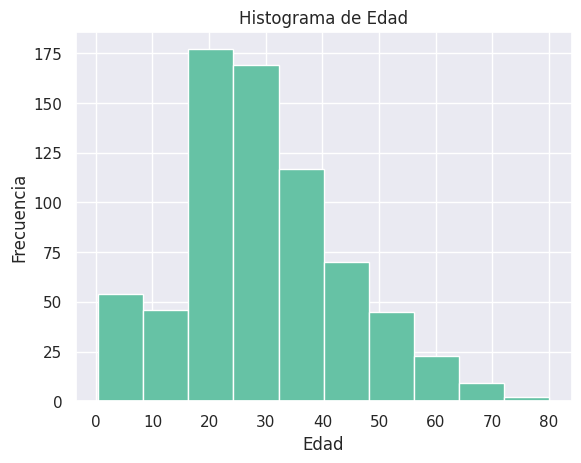

In [ ]:
# histograma
df['Age'].plot(kind='hist')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edad')
plt.show()

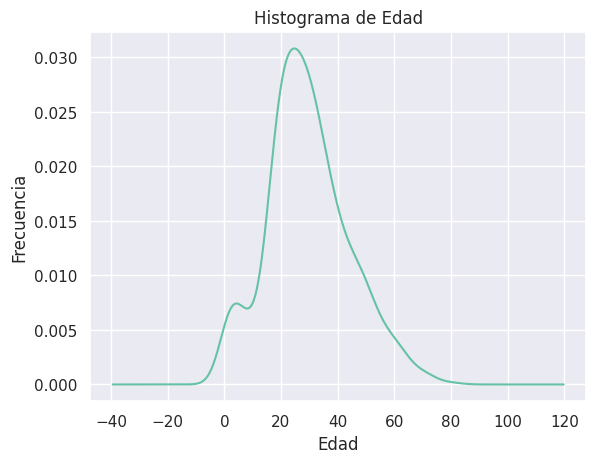

In [ ]:
# density o kde
df['Age'].plot(kind='density')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de Edad')
plt.show()

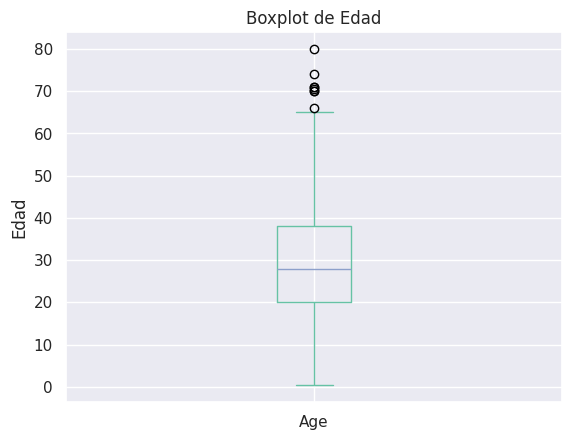

In [ ]:
# boxplot
df.plot(kind='box', column='Age')

# establecer las etiquetas de los ejes y el título
plt.xlabel('')
plt.ylabel('Edad')
plt.title('Boxplot de Edad')
plt.show()

### Variables categóricas

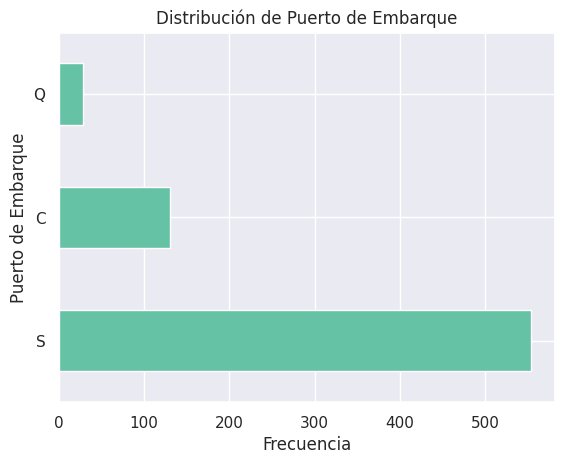

In [ ]:
# barplot
df['Embarked'].value_counts().plot(kind='barh', rot=0)
plt.xlabel('Frecuencia')
plt.ylabel('Puerto de Embarque')
plt.title('Distribución de Puerto de Embarque')
plt.show()

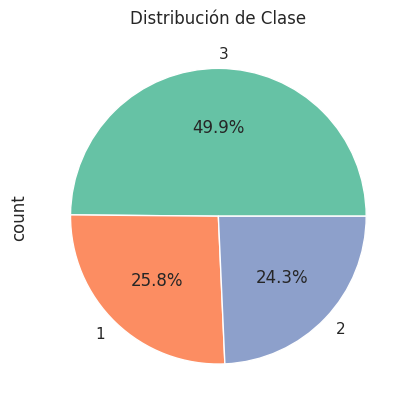

In [ ]:
df['Pclass'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribución de Clase')
plt.show()

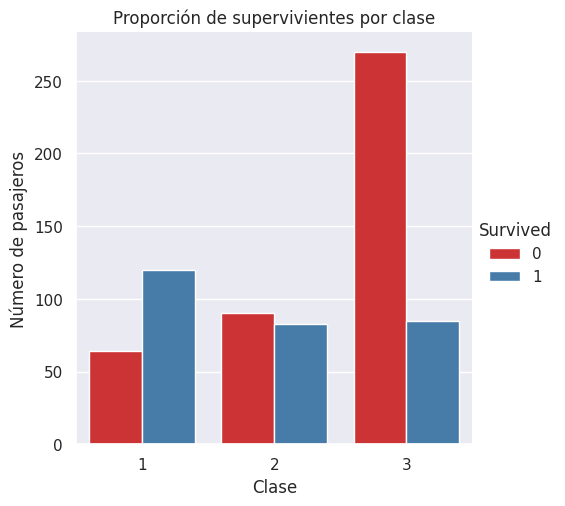

In [ ]:
# Catplot: crear un gráfico de barras utilizando seaborn
sns.catplot(x="Pclass", hue="Survived", kind="count", data=df, palette="Set1")

# Establecer las etiquetas de los ejes y el título del gráfico
plt.xlabel('Clase')
plt.ylabel('Número de pasajeros')
plt.title('Proporción de supervivientes por clase')

# Mostrar el gráfico
plt.show()

### Variables continuas vs categóricas

¿Que pasa si queremos visualizar la distribución de la variable continua pero según otra variable como puede ser el sexo? Es decir visualizar una distribución continua (`"Age"`) según una variable categórica (`"Sex"`). Para esto podemos usar de nuevo el histograma.

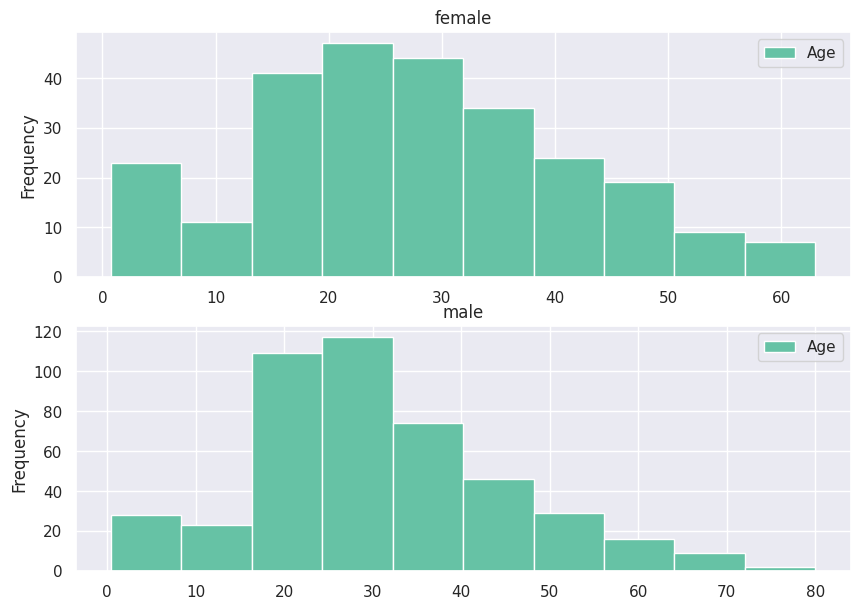

In [ ]:
# distribución de "edad" según "sexo"
df.plot(kind='hist', column='Age', by='Sex', figsize=(10, 7))
plt.show()

Text(0.5, 1.0, 'Distribución de edades por clase')

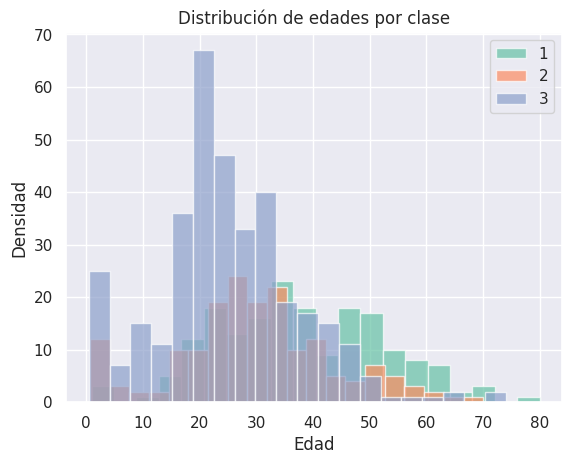

In [ ]:
# distribución de edad segun la clase
ax = df.groupby('Pclass')['Age'].plot(kind='hist', bins=20, alpha=0.7, legend=True)

# definimos las etiquetas de los ejes y el título del gráfico
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.title('Distribución de edades por clase')

Text(0.5, 1.0, 'Distribución de edades por estado de supervivencia')

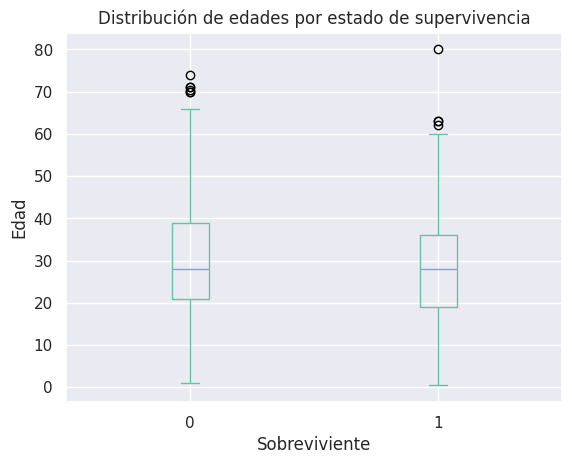

In [ ]:
df[['Survived', 'Age']].plot(kind='box', by='Survived')

plt.xlabel('Sobreviviente')
plt.ylabel('Edad')
plt.title('Distribución de edades por estado de supervivencia')

Text(0.5, 1.0, 'Distribución de edades por estado de supervivencia')

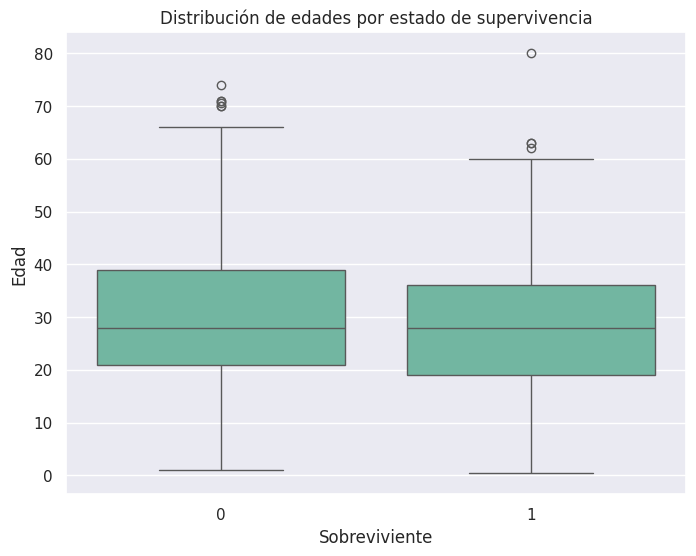

In [ ]:
# lo mismo pero con seaborn, necesitamos cambiar el tamño de la figura
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Age', data=df)

# Establecer las etiquetas de los ejes y el título del gráfico
plt.xlabel('Sobreviviente')
plt.ylabel('Edad')
plt.title('Distribución de edades por estado de supervivencia')

Text(0.5, 1.0, 'Distribución de tickets por estado de supervivencia')

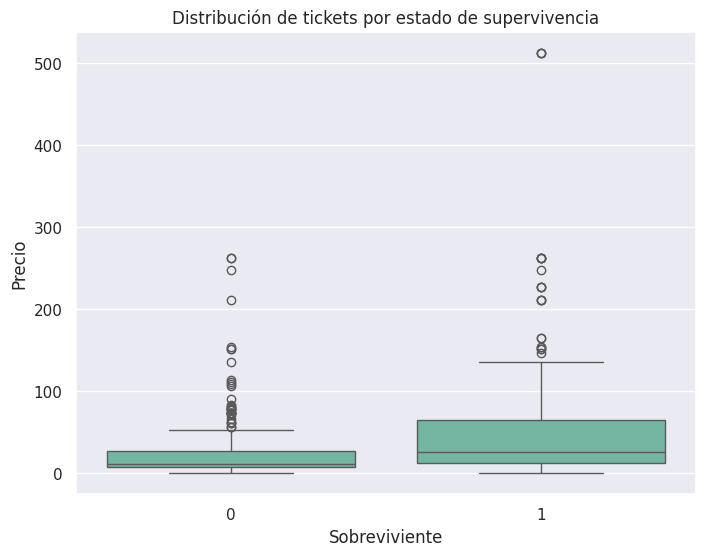

In [ ]:
# lo mismo pero con seaborn, necesitamos cambiar el tamño de la figura
plt.figure(figsize=(8, 6))
sns.boxplot(x='Survived', y='Fare', data=df)

# Establecer las etiquetas de los ejes y el título del gráfico
plt.xlabel('Sobreviviente')
plt.ylabel('Precio')
plt.title('Distribución de tickets por estado de supervivencia')

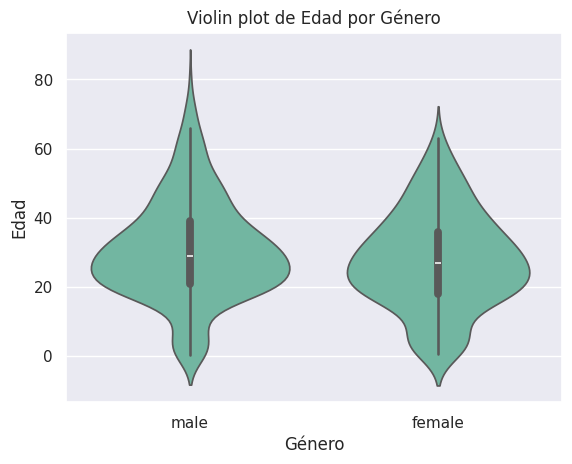

In [ ]:
# hacer un violin plot de la edad por género
sns.violinplot(x='Sex', y='Age', data=df)

# establecer las etiquetas de los ejes y el título
plt.xlabel('Género')
plt.ylabel('Edad')
plt.title('Violin plot de Edad por Género')
plt.show()

### Variables continuas vs continuas

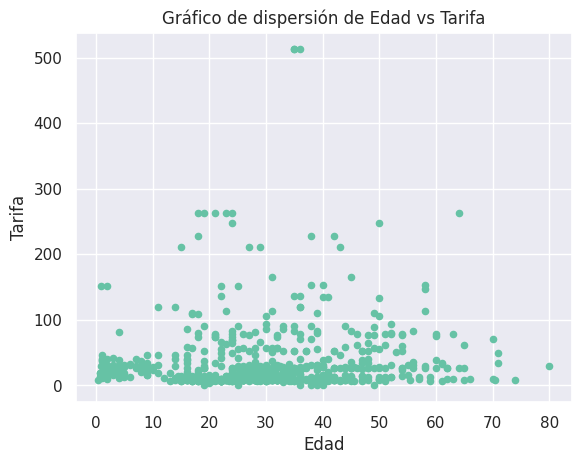

In [ ]:
# scatterplot: distribución de edades según cuanto pagaron
df.plot(x='Age', y='Fare', kind='scatter')
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.title('Gráfico de dispersión de Edad vs Tarifa')
plt.show()

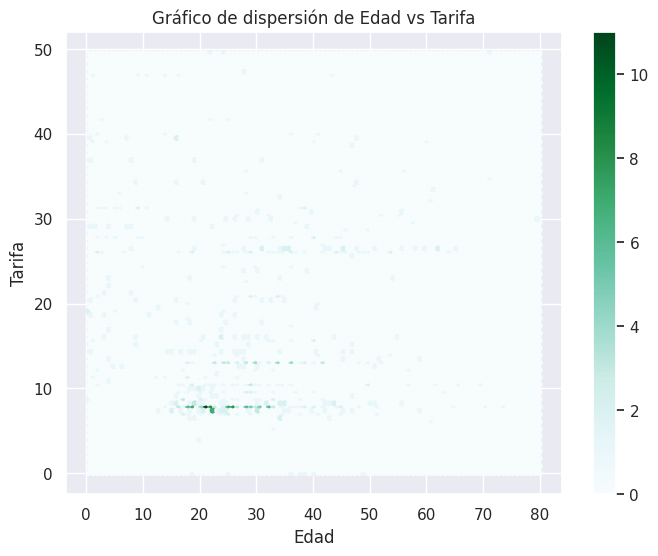

In [ ]:
# hexbin
df[df['Fare']<50].plot(x='Age', y='Fare', kind='hexbin', figsize=(8, 6))
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.title('Gráfico de dispersión de Edad vs Tarifa')
plt.show()

Le podemos agregar información categorica pintando por colores

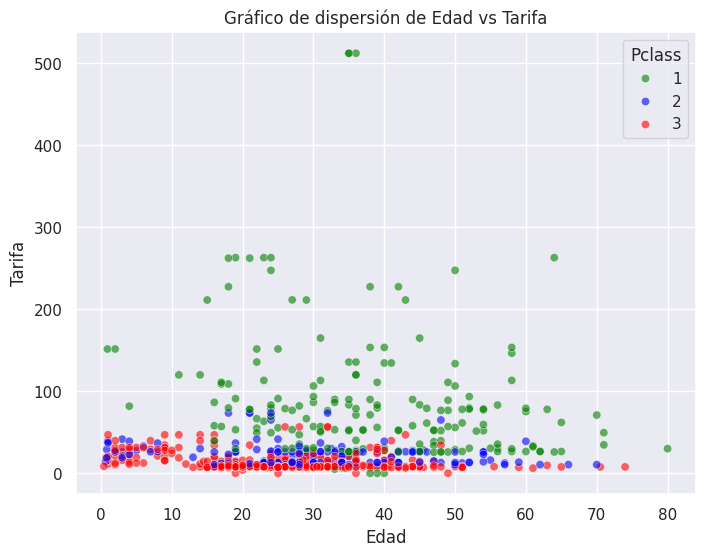

In [ ]:
# definimos colores preestablecidos para cada clase de pasajero
colors = {1:'green', 2:'blue', 3:'red'}

# crear un gráfico de dispersión utilizando Seaborn y asignando colores según la clase de pasajero
plt.subplots(figsize=(8, 6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Pclass', palette=colors, alpha=0.6)

# definimos las etiquetas de los ejes y el título del gráfico
plt.xlabel('Edad')
plt.ylabel('Tarifa')
plt.title('Gráfico de dispersión de Edad vs Tarifa')
plt.show()

### Variables categóricas vs categóricas

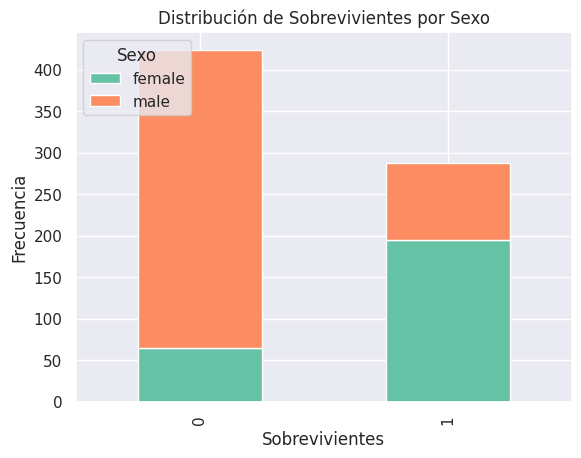

In [ ]:
pd.crosstab(df['Survived'], df['Sex']).plot(kind='bar', stacked=True)
plt.xlabel('Sobrevivientes')
plt.ylabel('Frecuencia')
plt.title('Distribución de Sobrevivientes por Sexo')
plt.legend(title='Sexo', loc='upper left')
plt.show()

¿Qué otros gráficos se les ocurren que podemos hacer?

# Ejercicio: EPH



La librería Pyeph tiene como objetivo facilitar el procesamiento en Python de las Encuesta Permanente de Hogares (eph) publicadas por INDEC de forma periódica. Está pensada como un espacio donde se nuclean y centralizan los cálculos vinculados a las mismas para posteriormente ser utilizadas en investigaciones, artículos, publicaciones, etc. Es una librería que hace principal hincapié en la transparencia metodológica utilizando licencias de código abierto y que promueve la colaboración de las comunidades de cientístas de datos, sociales, investigadorxs, desarrolladorxs, periodistas y demás curiosxs.

https://pyeph.readthedocs.io/es/latest/


Para entender qué representan las columnas ver documentación:


https://www.indec.gob.ar/ftp/cuadros/menusuperior/eph/EPH_diseno_reg_t414.pdf

In [3]:
#@title Librerias (correr)
%%capture
!pip install -q pyeph

In [4]:
import pyeph

In [5]:
# Ejemplo: traemos el 2do trimestre del 2021
eph = pyeph.get(data="eph", year=2021, period=2, base_type='individual') # EPH individual


Obtenido con exito: base_individual_2021T2.zip 


In [ ]:
eph.columns

Index(['CODUSU', 'ANO4', 'TRIMESTRE', 'NRO_HOGAR', 'COMPONENTE', 'H15',
       'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA',
       ...
       'PDECIFR', 'ADECIFR', 'IPCF', 'DECCFR', 'IDECCFR', 'RDECCFR', 'GDECCFR',
       'PDECCFR', 'ADECCFR', 'PONDIH'],
      dtype='object', length=177)

**Primer paso.** Crear una variable llamada eph_2 que contenga las siguientes columnas para realizar el siguiente análisis:

Edad (**CH_06**), Sexo (**CH_04**), Ingreso de la ocupación principal (**P21**), Categoría ocupacional (**CAT_OCUP**), Condición de actividad (**ESTADO**), Ponderación (**PONDERA**)

Referencias:

Sexo:
*   01 = Varón
*   02 = Mujer

Categoría ocupacional (para ocupados y desocupados con
ocupación anterior):
*   1 = Patrón
*   2 = Cuenta propia
*   3 = Obrero o empleado
*   4 = Trabajador familiar sin remuneración
*   9 = Ns/Nr

Estado - Condición de actividad:
*   0 = Entrevista individual no realizada
*   1 = Ocupado
*   2 = Descoupado
*   3 = Inactivo
*   4 = menor de 10 años

In [6]:
#Filtramos por columnas
eph_2 = eph[["CH06", "CH04", "P21", "CAT_OCUP", "ESTADO", "PONDERA"]].copy()

In [7]:
#Renombramos columnas
eph_2.columns = ["edad", "sexo", "ingreso", "cat_ocup", "estado", "pondera"]

La columna **pondera** representa un estimado poblacional de las personas que representa cada fila. Por lo tanto, para cada cálculo es necesario operar con esa columna. Por ejemplo, la fila 0 representa a 214 personas de 58 años de sexo masculino, que tienen $50.000 de ingreso de la ocupación principal, su categoría es cuentapropista y pertenecen al segmento de ocupados.   

In [8]:
eph_2.head(7)

,edad,sexo,ingreso,cat_ocup,estado,pondera
0,58,1,50000,2,1,214
1,24,1,0,3,2,214
2,51,2,0,4,1,192
3,27,1,4000,2,1,192
4,18,1,0,0,3,192
5,45,1,120000,3,1,192
6,28,2,12000,3,1,250


## Ejercicio 1

Hacer un gráfico de barras de el ingreso promedio para las primeras 3 categorías ocupacionales (Patrón, Cuenta propia y Obrero o empleado).

In [ ]:
eph_3 = eph_2[eph_2["cat_ocup"].isin([1,2,3])]
ingreso_por_categoria = eph_3.groupby("cat_ocup").apply(lambda x: (x["ingreso"] * x["pondera"]).sum() / x["pondera"].sum(),include_groups=False).reset_index()

/tmp/ipython-input-2453843215.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ingreso_por_categoria = eph_3.groupby("cat_ocup").apply(lambda x: (x["ingreso"] * x["pondera"]).sum() / x["pondera"].sum()).reset_index()


In [ ]:
ingreso_por_categoria

,cat_ocup,0
0,1,46369.419621
1,2,19226.605224
2,3,34723.106981


<Axes: xlabel='cat_ocup'>

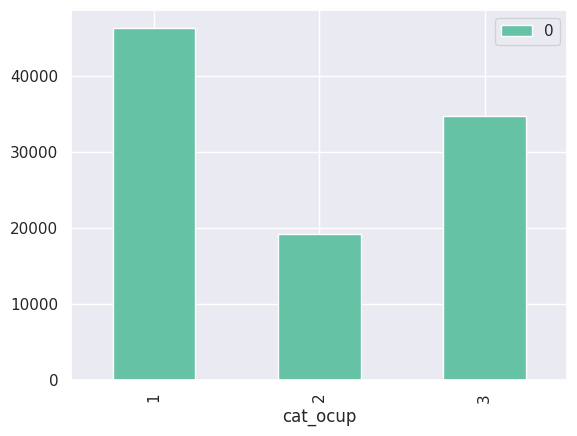

In [ ]:
ingreso_por_categoria.plot(x='cat_ocup',kind='bar')

## Ejercicio 2

Graficar nuevamente el ingreso promedio para las primeras 3 categorías ocupacionales, esta vez distinguiendo por sexo.


In [ ]:
eph_3 = eph_2[eph_2["cat_ocup"].isin([1,2,3])]
ingreso_por_categoria_sexo = eph_3.groupby(["cat_ocup","sexo"])[["ingreso","pondera"]].apply(lambda x: np.average(x["ingreso"],weights=x["pondera"])).reset_index()

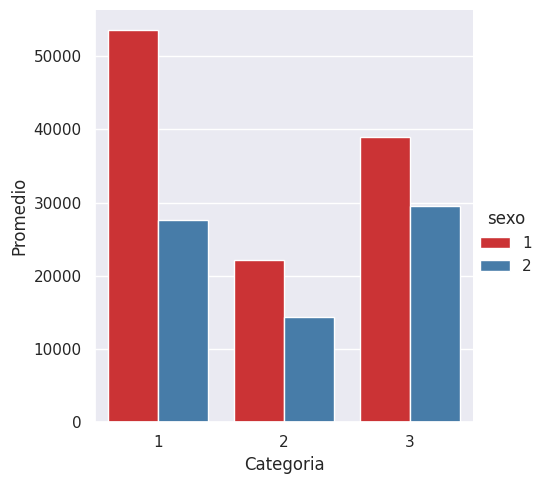

In [ ]:
# Catplot: crear un gráfico de barras utilizando seaborn
sns.catplot(x="cat_ocup", y=0, hue="sexo", kind='bar', data=ingreso_por_categoria_sexo, palette="Set1")

# Establecer las etiquetas de los ejes y el título del gráfico
plt.xlabel('Categoria')
plt.ylabel('Promedio')

# Mostrar el gráfico
plt.show()

## Ejercicio 3

Graficar el ingreso promedio según los siguientes grupos de edad: 0-24, 25-34, 34-44, 45-54, 54-100 (ayuda: usar la función `pd.cut()` para armar una columna que indique el grupo)

In [12]:
mask = eph_2["cat_ocup"].isin([1, 2, 3])
eph_3 = eph_2.loc[mask].copy()  # ← copia real

bins   = [0, 24, 34, 44, 54, 100]
labels = ["0-24", "25-34", "35-44", "45-54", "55-100"]

eph_3["grupo_edad"] = pd.cut(eph_3["edad"], bins=bins, labels=labels, right=True)

ingreso_por_categoria_edad = eph_3.groupby("grupo_edad", observed=True)[["ingreso","pondera"]].apply(lambda x: np.average(x["ingreso"],weights=x["pondera"])).reset_index()

<Axes: xlabel='grupo_edad'>

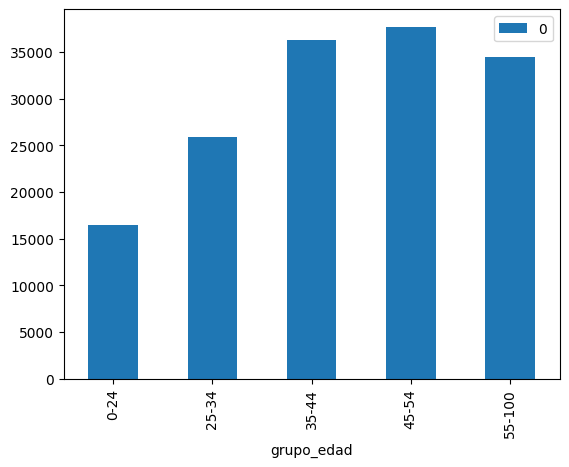

In [13]:
ingreso_por_categoria_edad.plot(x='grupo_edad',kind='bar')

<Axes: xlabel='grupo_edad'>

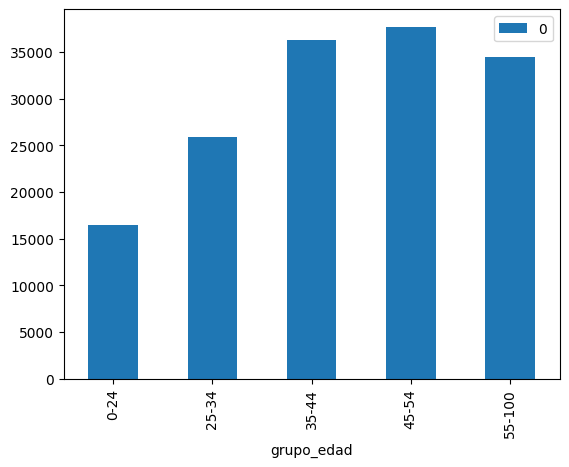

In [14]:
ingreso_por_categoria_edad = eph_3.groupby("grupo_edad", observed=True)[["ingreso","pondera"]].apply(lambda x:  (x["ingreso"] * x["pondera"]).sum() / x["pondera"].sum()).reset_index()
ingreso_por_categoria_edad.plot(x='grupo_edad',kind='bar')